In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


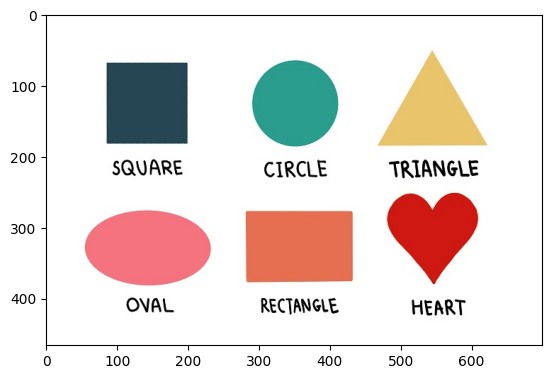

In [12]:
img = cv.imread("shape.jpg") #BGR
h,w,d =img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img) #RGB

## cropping image

In [13]:
x = 550
y =320

print(img[y][x][0])
print(img[y][x][1])
print(img[y][x][2])

print(img[y][x].shape)

207
24
18
(3,)


In [14]:
lis = [1,2,3,4,5,6]
lis[2:4]  

[3, 4]

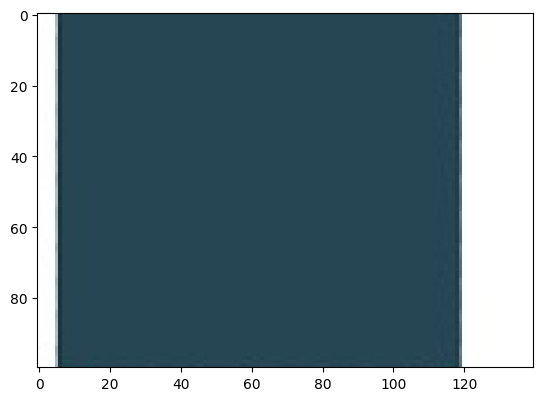

In [15]:
from copy import deepcopy
from math import cos, sin, radians
image = deepcopy(img)
y_start = 80
y_end = 180
x_start = 80
x_end = 220

cropped_image = image[y_start:y_end, x_start:x_end]

plt.imshow(cropped_image)


## translation

$\begin{bmatrix}
1 & 0 & T_x\\
0 & 1 & T_y
\end{bmatrix}$

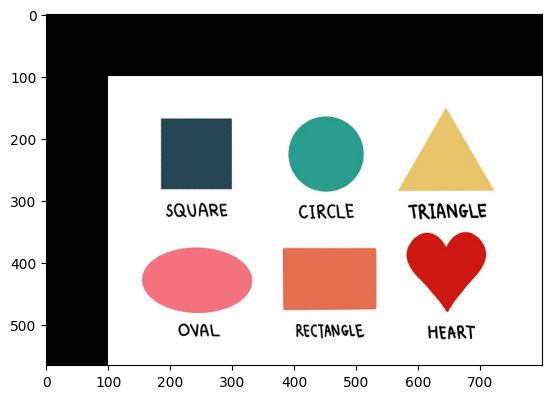

In [16]:
from copy import deepcopy
image = deepcopy(img)
shift_x = 100
shift_y = 100
translation_matrix = np.float32([[1, 0, shift_x], 
                                 [0, 1, shift_y]])
h,w,d = image.shape
translated_image = cv.warpAffine(image, translation_matrix, (w+100, h+100))
plt.imshow(translated_image)

## rotation matrix

### rotation matrix w/o scale and pivot point at (0,0)
$\begin{bmatrix}
cos(\theta) & -sin(\theta) & 0\\
sin(\theta) & cos(\theta) & 0
\end{bmatrix}$

### rotation matrix w/o scale and w/ given pivot point 
$\begin{bmatrix}
cos(\theta) & -sin(\theta) & center_x-center_y.cos(\theta)+center_y.sin(\theta)\\
sin(\theta) & cos(\theta) & center_y-center_x.sin(\theta)-center_y.cos(\theta) 
\end{bmatrix}$

### rotation matrix w scale and given pivot point 
$\begin{bmatrix}
s_x.cos(\theta) & -s_x.sin(\theta) & center_x-center_y.s_x.cos(\theta)+center_y.s_x.sin(\theta)\\
s_y.sin(\theta) & s_y.cos(\theta) & center_y-center_x.s_y.sin(\theta)-center_y.s_y.cos(\theta) 
\end{bmatrix}$

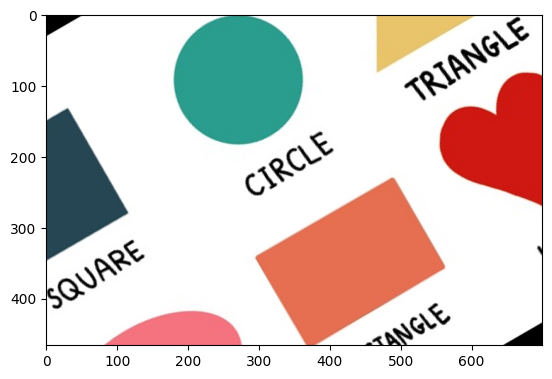

In [17]:
from copy import deepcopy
from math import cos, sin, radians
image = deepcopy(img)
shift_x = 100
shift_y = 100
# translated_image = cv.warpAffine(image, translation_matrix, (w, h))

h,w,d = image.shape
angle = 30
angle_rad = np.radians(angle)
scale = 1.5
center = (w // 2, h // 2)


# rotation_matrix = np.float32([[np.cos(angle_rad), -np.sin(angle_rad),0],
#                              [np.sin(angle_rad), np.cos(angle_rad),0]])
# example: w/o scaling
# rotation_matrix = np.float32(
#         [[np.cos(angle_rad), -np.sin(angle_rad), center[0] - center[0] * np.cos(angle_rad) + center[1] * np.sin(angle_rad)],
#         [np.sin(angle_rad), np.cos(angle_rad), center[1] - center[0] * np.sin(angle_rad) - center[1] * np.cos(angle_rad)]]
# )

rotation_matrix = cv.getRotationMatrix2D(center, angle, scale)
rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))
plt.imshow(rotated_image)


$\begin{bmatrix}
    1 & skew_y & 0\\
    skew_x & 1 & 0
\end{bmatrix}
$

Skew Transformation Matrix:
[[1.  0.  0. ]
 [0.1 1.  0. ]]


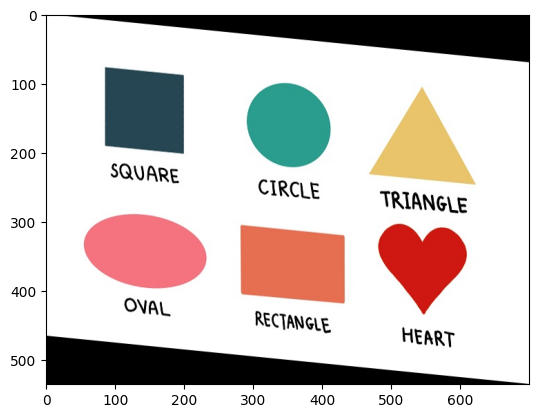

In [18]:
image = deepcopy(img)
skew_x = 0.1  # Skew factor for x
skew_y = 0  # Skew factor for y

skew_matrix = skew_matrix = np.array([
        [1, skew_y, 0],
        [skew_x, 1, 0]], dtype=np.float32)

print("Skew Transformation Matrix:")
print(skew_matrix)

height, width = image.shape[:2]
skewed_image = cv.warpAffine(image, skew_matrix, (int(width + height * skew_y), int(height + width * skew_x)))

plt.imshow(skewed_image)

# Perspective transform

### Interactive demo

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src_points = []
dst_points = []

def select_points(event, x, y, flags, param):
    global src_points
    if event == cv2.EVENT_LBUTTONDOWN: 
        src_points.append((x, y))
        print(f'Source Point Selected: ({x}, {y})')
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1) 
        cv2.imshow('Image', image)

image = cv2.imread('Road_in_Norway.jpg')
cv2.imshow('Image', image)

cv2.setMouseCallback('Image', select_points)

print("Click on 4 points in the image to select source points.")
cv2.waitKey(0)

if len(src_points) != 4:
    print("You must select exactly 4 points.")
else:
    height, width = 400, 600 
    dst_points = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype="float32")

    src_points = np.array(src_points, dtype="float32")

    matrix = cv2.getPerspectiveTransform(src_points, dst_points)

    warped_image = cv2.warpPerspective(image, matrix, (width, height))

    cv2.imshow('Warped Image', warped_image)
    cv2.waitKey(0)

cv2.destroyAllWindows()


Click on 4 points in the image to select source points.
Source Point Selected: (689, 461)
Source Point Selected: (878, 458)
Source Point Selected: (1219, 877)
Source Point Selected: (40, 878)


### use case example

[657. 479.]
[898. 475.]
[1218.  873.]
[ 31. 874.]


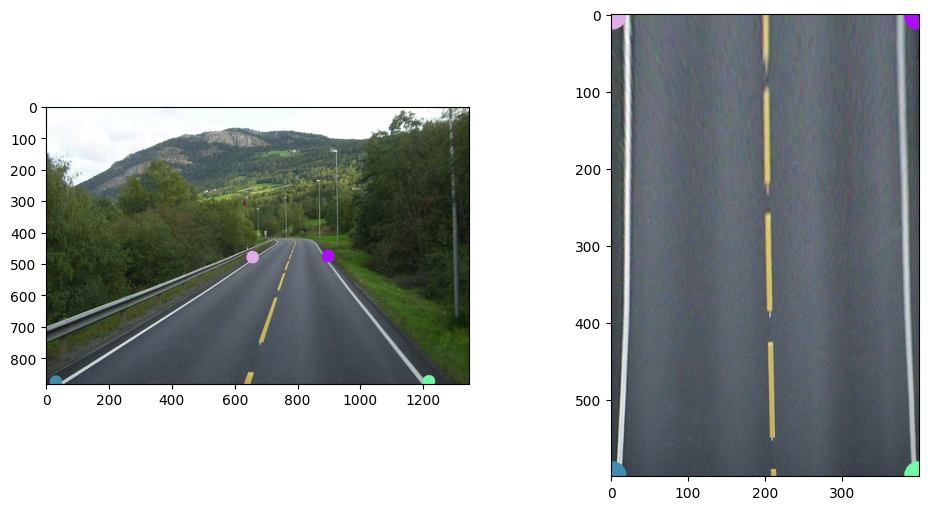

In [28]:
image = cv.imread("Road_in_Norway.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)


new_width = 400
new_height = 600

# order of points are important
src_points = np.float32([[657, 479], [898, 475], [1218, 873], [31, 874]])
dst_points = np.float32([[0,0], [new_width , 0], [new_width , new_height ], [0, new_height]])

perspective_matrix = cv.getPerspectiveTransform(src_points, dst_points)
perspective_transformed_image = cv.warpPerspective(image, perspective_matrix, (new_width, new_height))


cirlce_size = 20
for i in map(lambda x,y : [x,y], src_points,dst_points):
    import random as rng
    color = (rng.randint(0,255),rng.randint(0,255),rng.randint(0,255))
    print(i[0])
    cv.circle(image, i[0].astype(int),cirlce_size,color,-1)
    cv.circle(perspective_transformed_image, i[1].astype(int),cirlce_size,color,-1)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[1].imshow(perspective_transformed_image)